### Predicting incidence of breast cancer using Wisconsin Diagnostic Dataset

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Reference for customizing plots : http://matplotlib.org/users/customizing.html
# print(plt.style.available)

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from __future__ import print_function


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
#X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
print("Classes {}".format(np.unique(y)))
print(data.DESCR)

Classes [0 1]
Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Rad

In [2]:
from sklearn.metrics import f1_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {'gb':GradientBoostingClassifier(), 
          'mlp':MLPClassifier(), 
          'knn':KNeighborsClassifier(), 
          'reg':LogisticRegression()}

for model_key in models:
    model = models[model_key]
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds)
    print("F1 for {0}: {1}".format(model_key, f1))


F1 for gb: 0.948905109489051
F1 for mlp: 0.08571428571428572
F1 for knn: 0.923076923076923
F1 for reg: 0.9558823529411764


### Estimate Variable Importance

2018-08-15 23:21:17,304 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[30/30] features ████████████████████ Time elapsed: 1 seconds

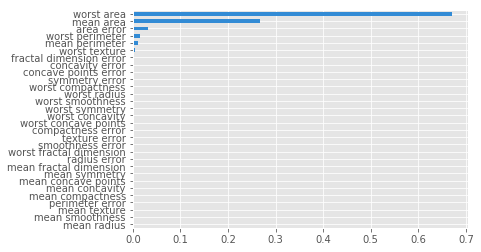

In [3]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

interpreter = Interpretation(X_test, feature_names=data.feature_names)
model = InMemoryModel(models['knn'].predict_proba, examples=X_train)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending=True)

### Skater also works with classifiers without probability scores

To enable classifier.predict methods, we need to tell the skater model object what the unique classes are, i.e. the set of possible values one could obtain from classifier.predict, with the `unique_values` argument. This is because Skater's algorithms need to know how perturbations in the input affect output frequencies. These possible outputs are obvious in regressions and classifiers that return probabilities, but need to be explicitly stated when MLE classes are returned.

2018-08-15 23:21:18,940 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[30/30] features ████████████████████ Time elapsed: 1 seconds

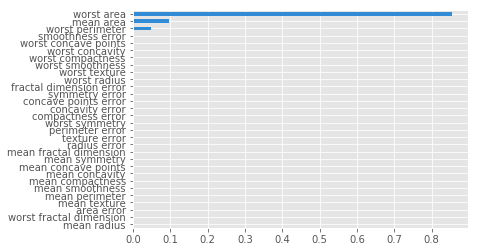

In [4]:
model_no_proba = InMemoryModel(models['knn'].predict, 
                      examples=X_train, 
                      unique_values=models['knn'].classes_)
plots = interpreter.feature_importance.plot_feature_importance(model_no_proba, ascending=True)

### Comparing variable importance across all models

2018-08-15 23:21:23,998 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[30/30] features ████████████████████ Time elapsed: 2 seconds

2018-08-15 23:21:26,261 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[30/30] features ████████████████████ Time elapsed: 2 seconds

2018-08-15 23:21:28,752 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[30/30] features ████████████████████ Time elapsed: 1 seconds

2018-08-15 23:21:30,004 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[30/30] features ████████████████████ Time elapsed: 1 seconds

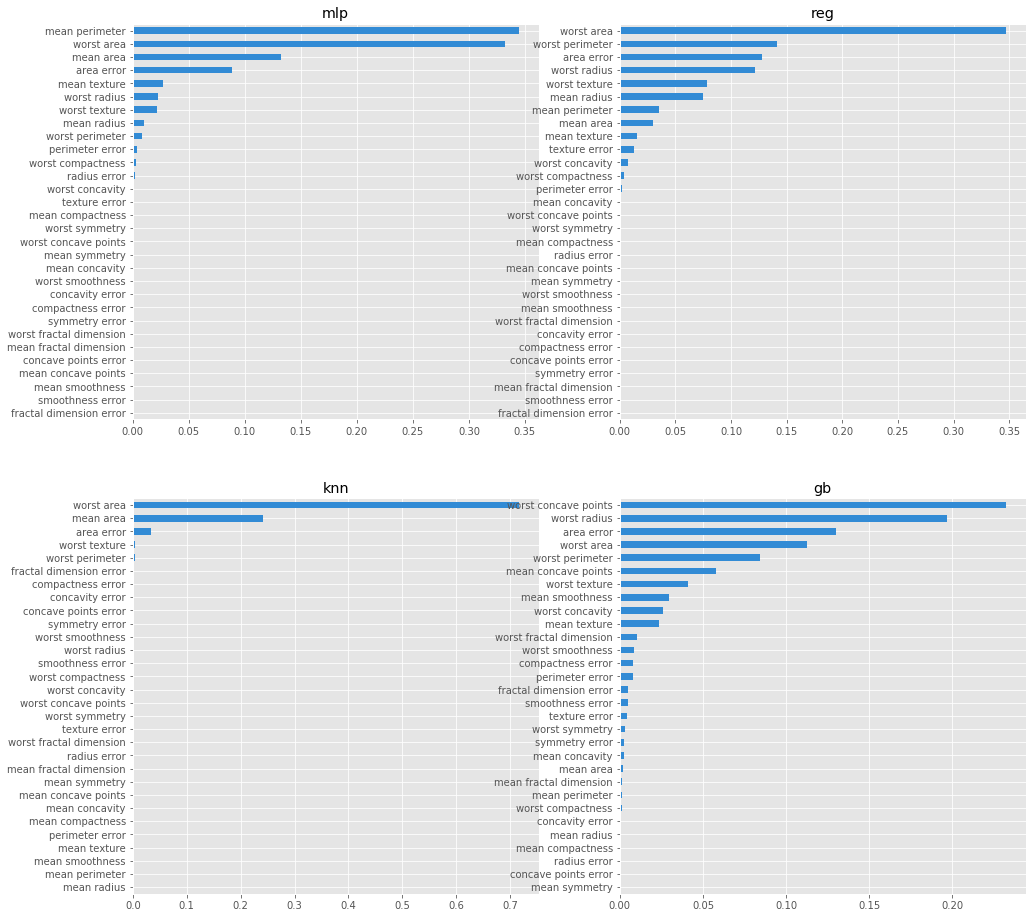

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

f, axes = plt.subplots(2,2, figsize = (16, 16))

ax_dict = {
    'mlp':axes[0][0],
    'knn':axes[1][0],
    'reg':axes[0][1],
    'gb':axes[1][1]
}

interpreter = Interpretation(X_test, feature_names=data.feature_names)

for model_key in models:
    pyint_model = InMemoryModel(models[model_key].predict_proba, examples=X_train)
    ax = ax_dict[model_key]
    interpreter.feature_importance.plot_feature_importance(pyint_model, ax=ax, ascending = True)
    ax.set_title(model_key)

### Use partial dependence to understand the relationship between a variable and a model's predictions

2018-08-15 23:21:32,087 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[30/30] grid cells ████████████████████ Time elapsed: 2 seconds

2018-08-15 23:21:34,307 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[30/30] grid cells ████████████████████ Time elapsed: 2 seconds

2018-08-15 23:21:36,915 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

2018-08-15 23:21:38,134 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[30/30] grid cells ████████████████████ Time elapsed: 2 seconds

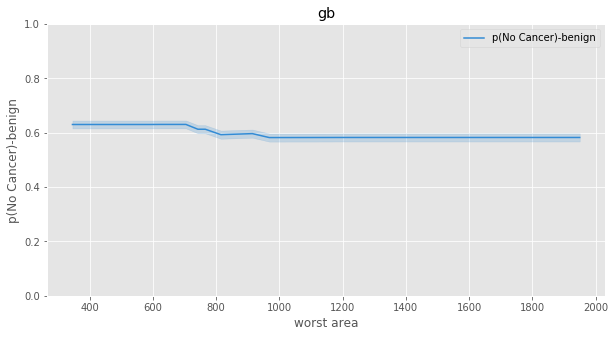

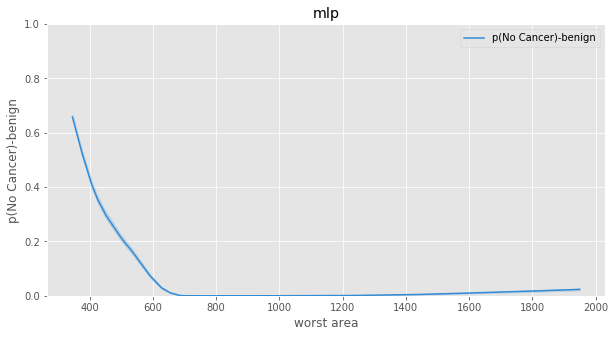

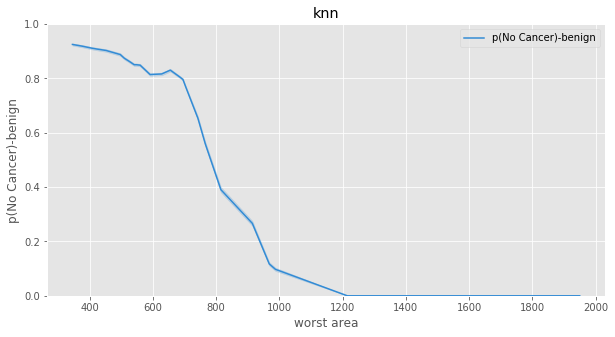

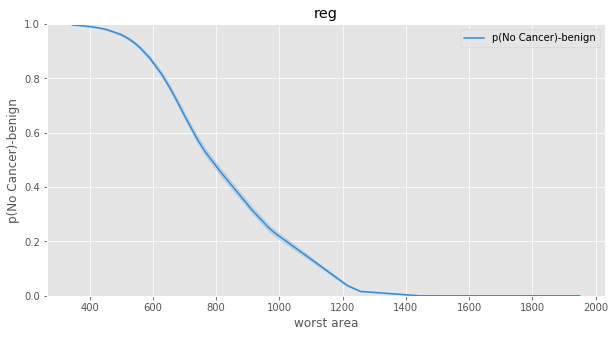

In [6]:
for model_key in models:
    pyint_model = InMemoryModel(models[model_key].predict_proba, examples=X_train, target_names=['p(Cancer)-malignant', 'p(No Cancer)-benign'])
    axes_list = interpreter.partial_dependence.plot_partial_dependence(['worst area'],
                                                                       pyint_model, 
                                                                       grid_resolution=30, 
                                                                       with_variance=True,
                                                                       figsize = (10, 5))
    ax = axes_list[0][1]
    ax.set_title(model_key)
    ax.set_ylim(0, 1)

### Why isnt gb as sensitive to worst area? 

* **Feature importance indicates gb uses more features, perhaps theres additivity?** 
* **Lets use LIME to approximate the model with a regression, locally around a point **

In [7]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
exp = LimeTabularExplainer(X_train.values, 
                           feature_names=data.feature_names, 
                           discretize_continuous=True, 
                           class_names=['p(Cancer)-malignant', 'p(No Cancer)-benign'])
exp.explain_instance(X_train.iloc[0].values, models['gb'].predict_proba).show_in_notebook()

In [8]:
exp.explain_instance(X_train.iloc[0].values, models['knn'].predict_proba).show_in_notebook()

### Interaction between worst area and perimeter for gb model?

2018-08-15 23:21:43,182 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[100/100] grid cells ████████████████████ Time elapsed: 7 seconds

[[<matplotlib.figure.Figure at 0x7f63ec28f908>,

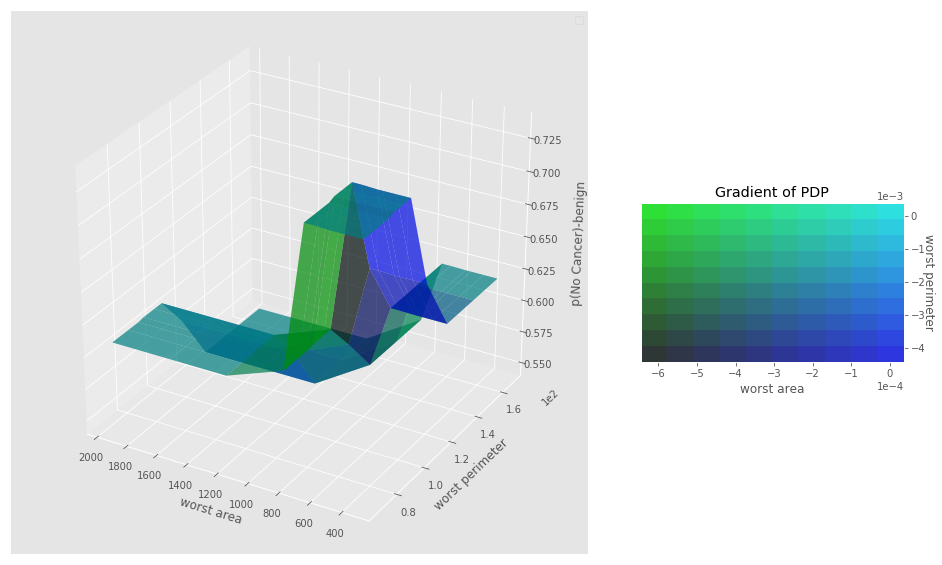

In [9]:
model = InMemoryModel(models['gb'].predict_proba, examples=X_train, target_names=['p(Cancer)-malignant', 
                                                                                  'p(No Cancer)-benign'])
interpreter.partial_dependence.plot_partial_dependence([('worst area', 'worst perimeter')], model, 
                                                       grid_resolution=10)

### Explore the relationship interactively

In [10]:
%matplotlib notebook
#interpreter.partial_dependence.plot_partial_dependence([('worst area', 
#                                                         'worst perimeter')], 
#                                                       model, 
#                                                       grid_resolution = 30, 
#                                                       figsize = (11, 5))

### Explaning using TreeSurrogates

In [11]:
from skater.core.global_interpretation.tree_surrogate import TreeSurrogate
from skater.util.dataops import show_in_notebook

# Using the interpreter instance invoke call to the TreeSurrogate
surrogate_explainer = interpreter.tree_surrogate(estimator_type='classifier', feature_names=data.feature_names, 
                                                 class_names=data.target_names, seed=5)

In [12]:
y_hat_train = models['gb'].predict(X_train)
y_hat = models['gb'].predict(X_test)

In [13]:
print("Training report ...")
from sklearn.metrics import classification_report
print(classification_report(y_train, y_hat_train, target_names=data.target_names))


print("--------------------------------------------------")
print("Testing report ...")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat, target_names=data.target_names))

Training report ...
             precision    recall  f1-score   support

  malignant       1.00      1.00      1.00       165
     benign       1.00      1.00      1.00       290

avg / total       1.00      1.00      1.00       455

--------------------------------------------------
Testing report ...
             precision    recall  f1-score   support

  malignant       0.95      0.89      0.92        47
     benign       0.93      0.97      0.95        67

avg / total       0.94      0.94      0.94       114



In [14]:
surrogate_explainer.learn(X_train, y_hat_train, oracle_y=y_train, cv=True)

2018-08-15 23:21:51,228 - skater.model.base - WARNING - No examples provided, cannot infer model type
2018-08-15 23:21:51,230 - skater.core.global_interpretation.tree_surrogate - WARNING - fidelity score:0.04153302178812468 of the surrogate model is higher than the impurity threshold: 0.01


0.04153302178812468

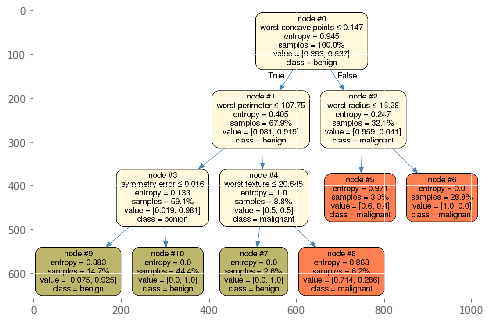

In [20]:
## matplotlib plots quality is not that great. Interactive visualization of the trees are being worked on.
%matplotlib inline
surrogate_explainer.plot_global_decisions(colors=['coral', 'darkkhaki'], file_name='simple_tree_class.png', 
                                          fig_size=(8, 8))

In [16]:
y_hat_surrogate = surrogate_explainer.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat_surrogate, target_names=data.target_names))

             precision    recall  f1-score   support

  malignant       0.95      0.89      0.92        47
     benign       0.93      0.97      0.95        67

avg / total       0.94      0.94      0.94       114



In [17]:
clf = models['gb']
sample_index = 0
class_names = data.target_names
print("Oracle Model: {}".format(class_names[clf.predict(X_test.iloc[sample_index].values.reshape(1, -1))]))
print("Using TreeSurrogate: {}".
      format(class_names[surrogate_explainer.predict(X_test.iloc[sample_index].values.reshape(1, -1))]))
print("Ground Truth: {}".format(class_names[y_test[sample_index]]))

Oracle Model: ['benign']
Using TreeSurrogate: ['benign']
Ground Truth: benign


2018-08-15 23:21:51,677 - skater.util.dataops - INFO - File Name: simple_tree_class.png


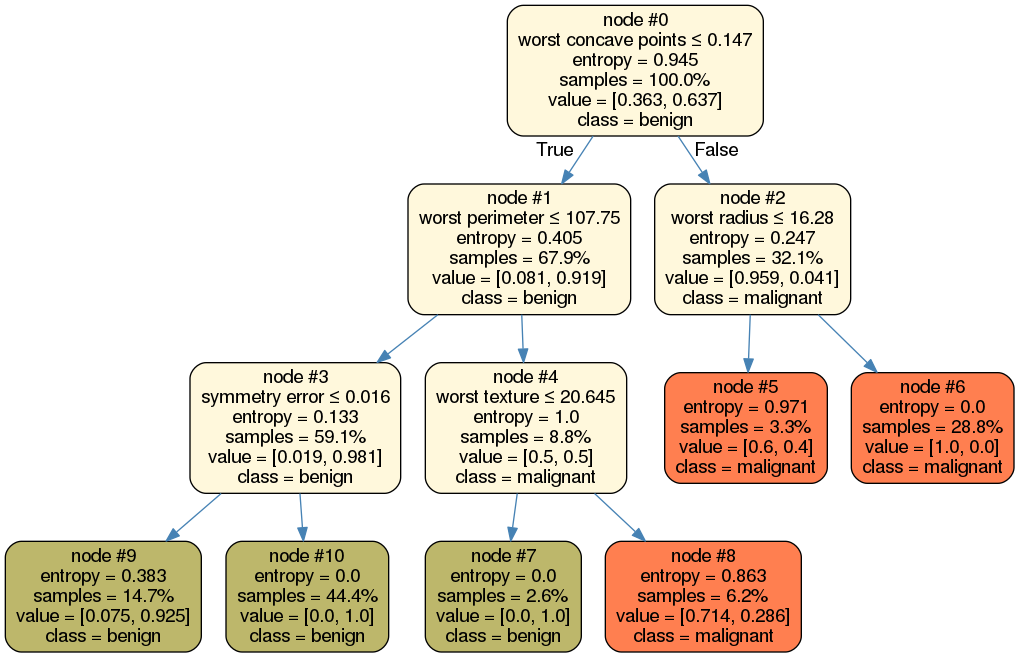

In [18]:
show_in_notebook('simple_tree_class.png', width=400, height=300)

In [19]:
# Class Labels: Malignant(0); Benign(1)
surrogate_explainer.decisions_as_txt('local', X_test.iloc[sample_index])

As worst concave points[0.06005] <= 0.14695000648498535 then,
  As worst perimeter[91.29] <= 107.75 then,
    As symmetry error[0.01347] <= 0.01577499881386757 then,
        Predicted Label: 1
